<a href="https://colab.research.google.com/github/Hennakk/image-processing/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cd /content/drive/MyDrive

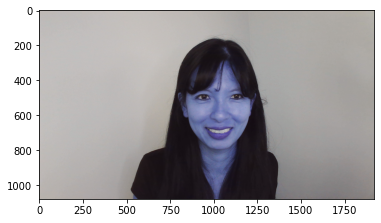

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

image_path = "/content/drive/MyDrive/image.png"
img_bgr = cv2.imread(image_path)		# openCV로 이미지를 불러온기
img_show = img_bgr.copy()				# 출력용 이미지를 따로 저장하기
plt.imshow(img_bgr)
plt.show()

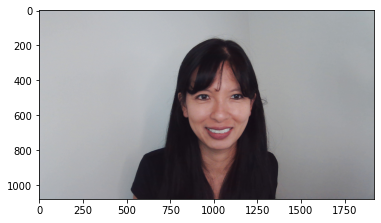

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(846, 418) (1231, 804)]]


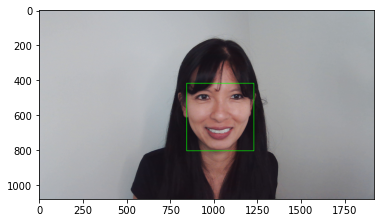

In [ ]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
model_path = "/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아낸다
for dlib_rect in dlib_rects:
	points = landmark_predictor(img_rgb, dlib_rect)
	# face landmark 좌표를 저장
	list_points = list(map(lambda p: (p.x, p.y), points.parts()))
	list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


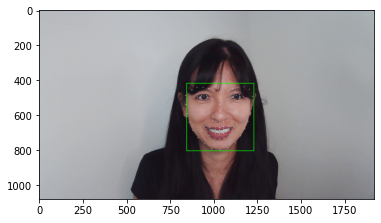

In [ ]:
for landmark in list_landmarks:
	for point in landmark:
		cv2.circle(img_show, point, 2, (255, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[29][1] - dlib_rect.height()//2
    w = dlib_rect.width() + dlib_rect.height()//2
    h = dlib_rect.width() + dlib_rect.height()//2
    print('(x,y) : (%d, %d)'%(x,y))
    print('(w,h) : (%d, %d)'%(w,h))

(1035, 616)
(x,y) : (1035, 384)
(w,h) : (579, 579)


In [ ]:
sticker_path = '/content/drive/MyDrive/Safety-Helmet-PNG-Transparent.png'
img_king = cv2.imread(sticker_path) 
img_king = cv2.resize(img_king, (w,h))
print(img_king.shape)

(579, 579, 3)


In [ ]:
refined_x = x -w//2
refined_y = y- h + dlib_rect.height()//2
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (746,-2)


In [ ]:
if refined_x < 0:
    img_king = img_king[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_king = img_king[-refined_y:, :]
    refined_y = 0

print('(x,y) : (%d, %d)'%(refined_x, refined_y))

(x,y) : (746, 0)


In [ ]:
king_area = img_show[refined_y:refined_y+img_king.shape[0], refined_x:refined_x+img_king.shape[1]]
img_show[refined_y:refined_y+img_king.shape[0], refined_x:refined_x+img_king.shape[1]] = np.where(img_king==0,king_area,img_king).astype(np.uint8)

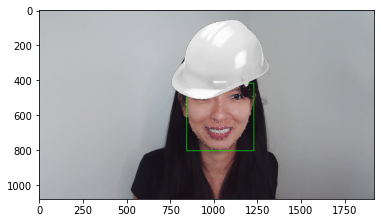

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

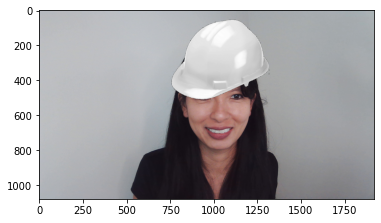

In [ ]:
sticker_area = img_bgr[refined_y:refined_y +img_king.shape[0], refined_x:refined_x+img_king.shape[1]]
img_bgr[refined_y:refined_y +img_king.shape[0], refined_x:refined_x+img_king.shape[1]] = np.where(img_king==0,sticker_area,img_king).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()